In [1]:
import numpy as np
import matplotlib.pyplot as plt


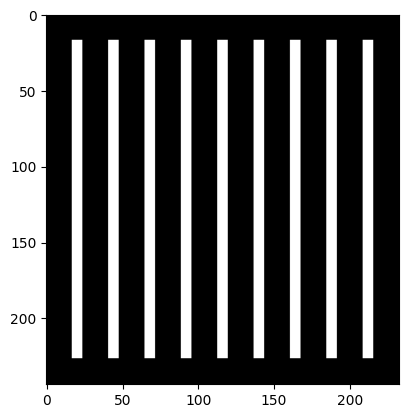

In [103]:
#Recreate image
width = 7
height = 210
space = 17
border = 17
num_bars = 9

image_width = num_bars * width + (num_bars - 1) * space + 2 * border
image_with_bars = np.zeros((height + 2 * border, image_width))

for i in range(num_bars):
    start_x = border + i * (width + space)
    image_with_bars[border:height + border, start_x:start_x + width] = 255

plt.imshow(image_with_bars, cmap='gray')
plt.show()

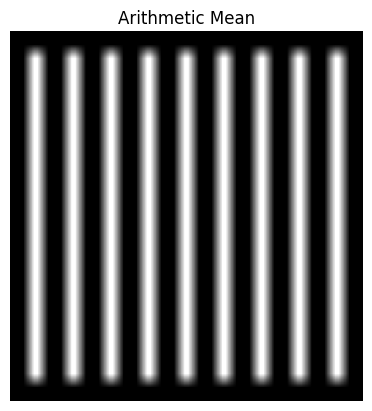

In [104]:
#Arithmetic Mean
def arithmetic_mean_filter(image):
    filter_size = 9
    filtered_image = np.zeros((image.shape[0] - filter_size + 1, image.shape[1] - filter_size + 1))
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            filtered_image[i, j] = np.mean(image[i:i+filter_size, j:j+filter_size])
    return filtered_image

filtered_image_arithmetic = arithmetic_mean_filter(image_with_bars)
plt.imshow(filtered_image_arithmetic, cmap='gray')
plt.title('Arithmetic Mean')
plt.axis('off')
plt.show()


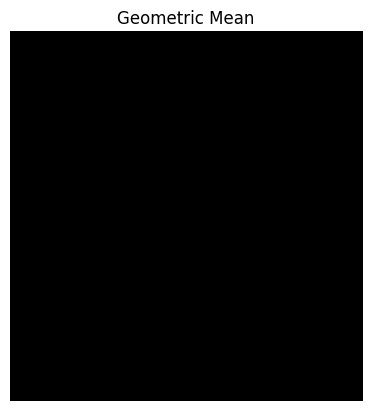

In [93]:
#Geometric Mean
def geometric_mean_filter(image):
    filter_size = 9
    filtered_image = np.zeros((image.shape[0] - filter_size + 1, image.shape[1] - filter_size + 1))
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            filtered_image[i, j] = np.prod(image[i:i+filter_size, j:j+filter_size])**(1/(filter_size**2))
    return filtered_image

filtered_image_arithmetic = geometric_mean_filter(image_with_bars)
plt.imshow(filtered_image_arithmetic, cmap='gray')
plt.title('Geometric Mean')
plt.axis('off')
plt.show()


/var/folders/1f/_308mdp92hd4dnhtd2p2jgk40000gn/T/ipykernel_74462/59240439.py:7: RuntimeWarning: divide by zero encountered in divide
  sum_reciprocals = np.sum(1 / region)


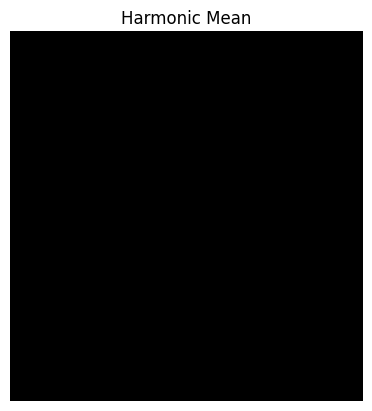

In [94]:
#Harmonic Mean
def harmonic_mean_filter(image):
    filter_size = 9
    filtered_image = np.zeros((image.shape[0] - filter_size + 1, image.shape[1] - filter_size + 1))
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            region = image[i:i+filter_size, j:j+filter_size]
            sum_reciprocals = np.sum(1 / region)
            filtered_image[i, j] = (filter_size**2) / sum_reciprocals
    return filtered_image


filtered_image_arithmetic = harmonic_mean_filter(image_with_bars)
plt.imshow(filtered_image_arithmetic, cmap='gray')
plt.title('Harmonic Mean')
plt.axis('off')
plt.show()

/var/folders/1f/_308mdp92hd4dnhtd2p2jgk40000gn/T/ipykernel_74462/4138641348.py:7: RuntimeWarning: divide by zero encountered in reciprocal
  denominator = np.sum((image[i:i+filter_size, j:j+filter_size]) ** Q) + 1e-9


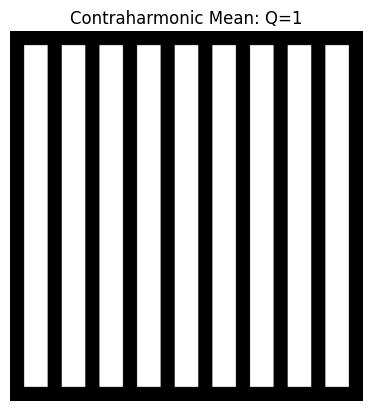

In [95]:
#Contraharmonic Mean Q=1
def contraharmonic_mean_filter(image, Q):
    filter_size = 9
    filtered_image = np.zeros((image.shape[0] - filter_size + 1, image.shape[1] - filter_size + 1))
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            numerator = np.sum((image[i:i+filter_size, j:j+filter_size]) ** (Q + 1))
            denominator = np.sum((image[i:i+filter_size, j:j+filter_size]) ** Q) + 1e-9
            filtered_image[i, j] = numerator / denominator
    return filtered_image

filtered_image_arithmetic_1 = contraharmonic_mean_filter(image_with_bars, 1)
filtered_image_arithmetic_0 = contraharmonic_mean_filter(image_with_bars, 0)
filtered_image_arithmetic_n1 = contraharmonic_mean_filter(image_with_bars, -1)

plt.imshow(filtered_image_arithmetic_1, cmap='gray')
plt.title('Contraharmonic Mean: Q=1')
plt.axis('off')
plt.show()

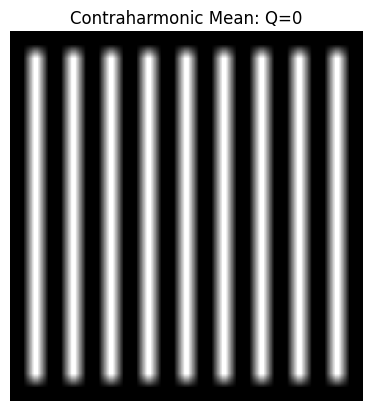

In [96]:
#Contraharmonic Mean Q=0
plt.imshow(filtered_image_arithmetic_0, cmap='gray')
plt.title('Contraharmonic Mean: Q=0')
plt.axis('off')
plt.show()

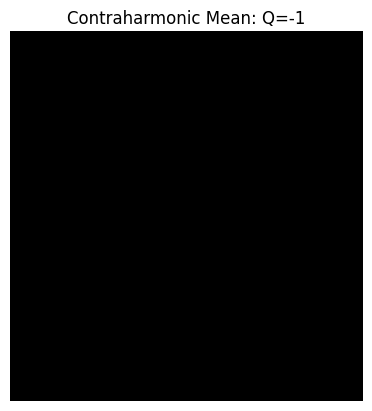

In [97]:
#Contraharmonic Mean Q=-1
plt.imshow(filtered_image_arithmetic_n1, cmap='gray')
plt.title('Contraharmonic Mean: Q=-1')
plt.axis('off')
plt.show()

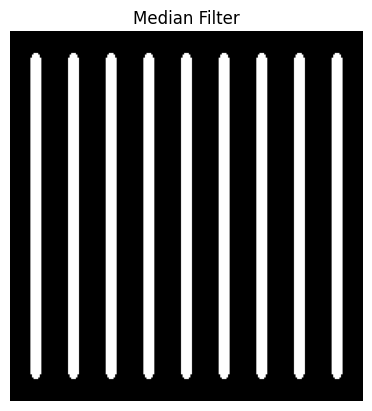

In [98]:
#Median Filter
def median_filter(image):
    filter_size = 9
    filtered_image = np.zeros((image.shape[0] - filter_size + 1, image.shape[1] - filter_size + 1))
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            filtered_image[i, j] = np.median(image[i:i+filter_size, j:j+filter_size])
    return filtered_image

filtered_image_arithmetic = median_filter(image_with_bars)

plt.imshow(filtered_image_arithmetic, cmap='gray')
plt.title('Median Filter')
plt.axis('off')
plt.show()


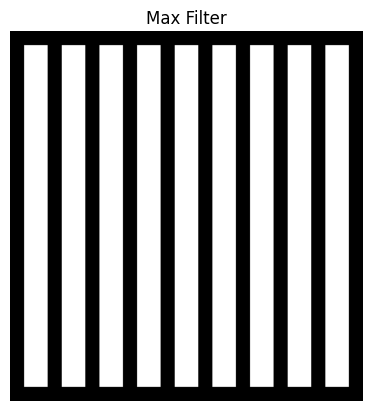

In [99]:
#Max Filter
def max_filter(image):
    filter_size = 9
    filtered_image = np.zeros((image.shape[0] - filter_size + 1, image.shape[1] - filter_size + 1))
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            filtered_image[i, j] = np.max(image[i:i+filter_size, j:j+filter_size])
    return filtered_image

filtered_image_arithmetic = max_filter(image_with_bars)

plt.imshow(filtered_image_arithmetic, cmap='gray')
plt.title('Max Filter')
plt.axis('off')
plt.show()

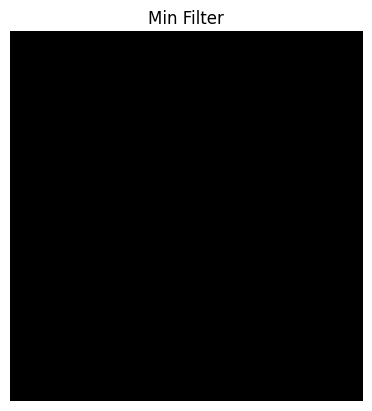

In [100]:
#Min Filter
def min_filter(image):
    filter_size = 9
    filtered_image = np.zeros((image.shape[0] - filter_size + 1, image.shape[1] - filter_size + 1))
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            filtered_image[i, j] = np.min(image[i:i+filter_size, j:j+filter_size])
    return filtered_image

filtered_image_arithmetic = min_filter(image_with_bars)

plt.imshow(filtered_image_arithmetic, cmap='gray')
plt.title('Min Filter')
plt.axis('off')
plt.show()

In [105]:
#Midpoint Filter
def midpoint_filter(image, size):
    filtered_image = np.zeros_like(image)
    padding_size = size // 2
    
    for i in range(padding_size, image.shape[0] - padding_size):
        for j in range(padding_size, image.shape[1] - padding_size):
            window = image[i - padding_size:i + padding_size + 1, j - padding_size:j + padding_size + 1]
            min_val = np.min(window)
            max_val = np.max(window)
            midpoint = (min_val + max_val) / 2
            filtered_image[i, j] = midpoint
    
    return filtered_image

filtered_image = midpoint_filter(image_with_bars, 9)

#plt.imshow(filtered_image, cmap='gray')
#plt.axis('off')
#plt.show()

array = filtered_image[10:22, 10:22]
print(array)



[[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.  127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5]
 [  0.    0.    0.  127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5]
 [  0.    0.    0.  127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5]
 [  0.    0.    0.  127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5]
 [  0.    0.    0.  127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5]
 [  0.    0.    0.  127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5]
 [  0.    0.    0.  127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5]
 [  0.    0.    0.  127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5]
 [  0.    0.    0.  127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5 127.5]]
